(108, 10)


,Date,Exercise,WeightLifted,Reps,Sets,SleepHours,ProteinIntake,Calories,SorenessLevel,Bodyweight
0,2024-06-03,Bench Press,132.2,5,3,8.1,147,2765,6,153.0
1,2024-06-03,Squat,191.3,7,3,8.1,147,2765,6,153.2
2,2024-06-03,Deadlift,201.0,6,3,8.1,147,2765,6,153.3
3,2024-06-05,Bench Press,127.2,5,3,7.7,133,2683,1,153.3
4,2024-06-05,Squat,180.8,8,3,7.7,133,2683,1,153.3


Exercise
Bench Press    36
Squat          36
Deadlift       36
Name: count, dtype: int64

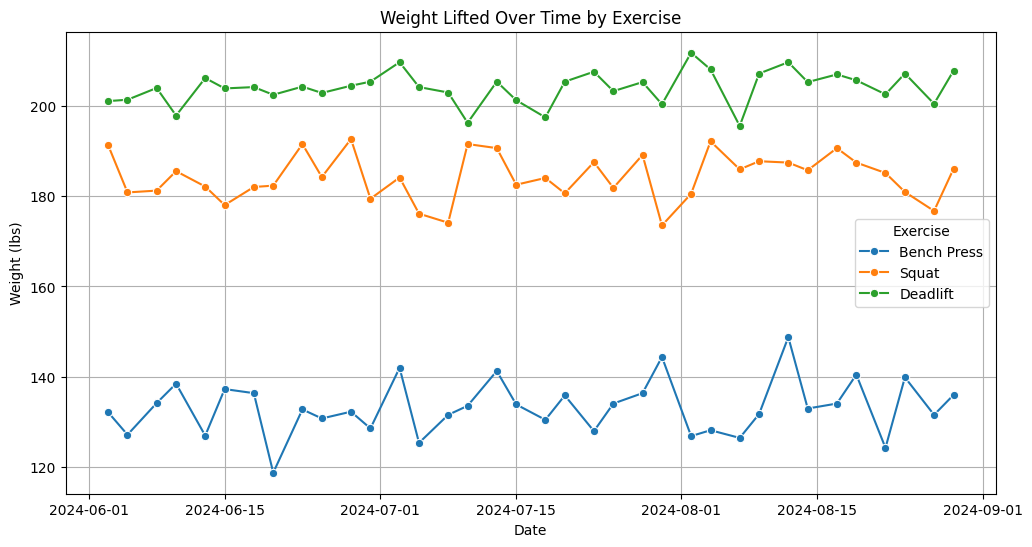

Average weight lifted per exercise:
Exercise
Bench Press    133.188889
Deadlift       203.961111
Squat          184.230556
Name: WeightLifted, dtype: float64


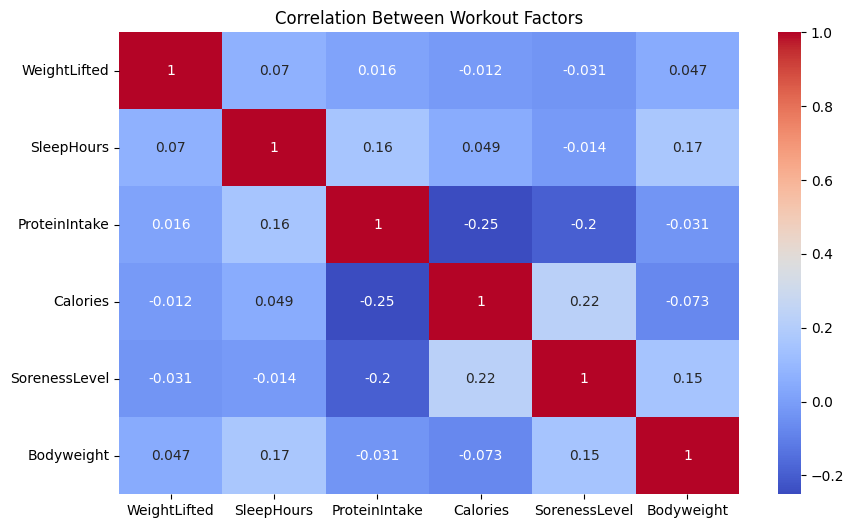

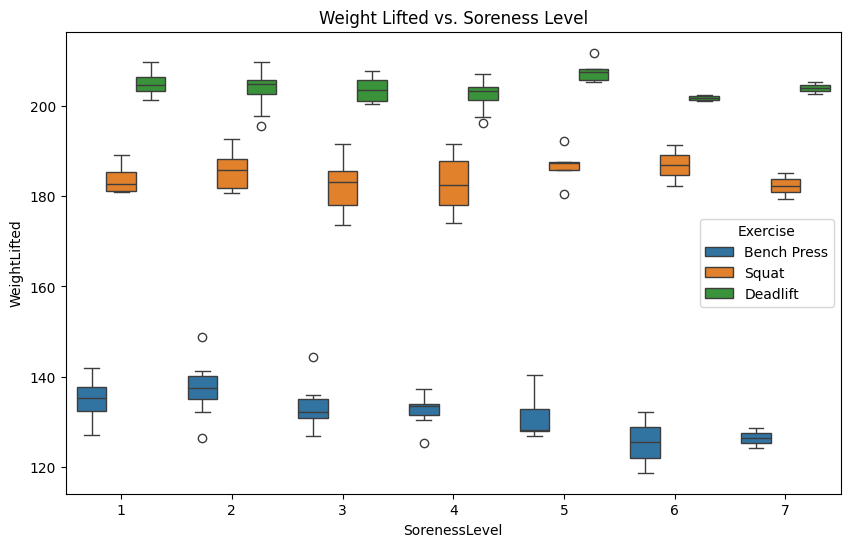

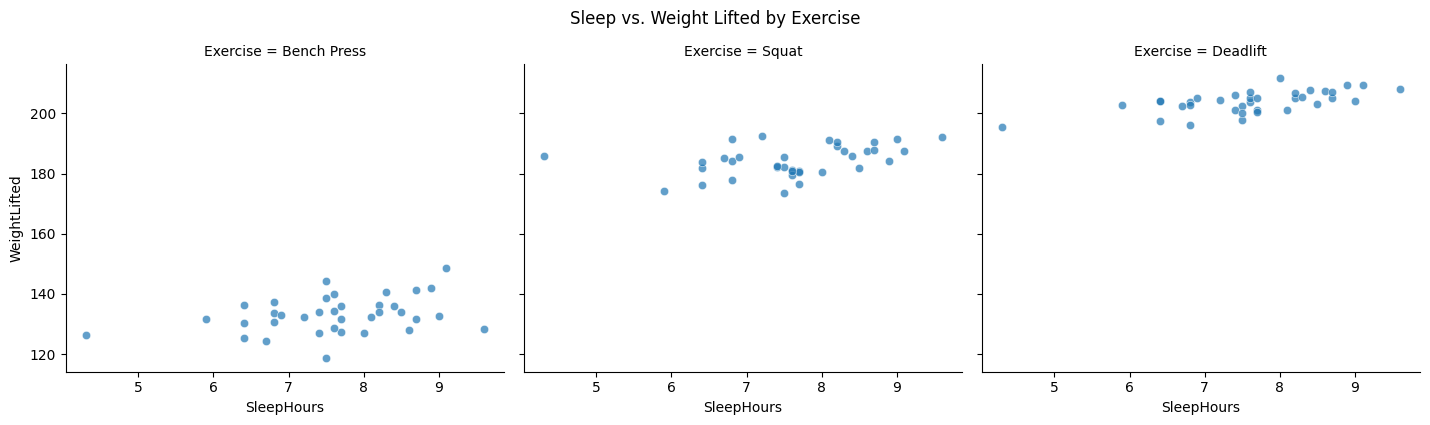

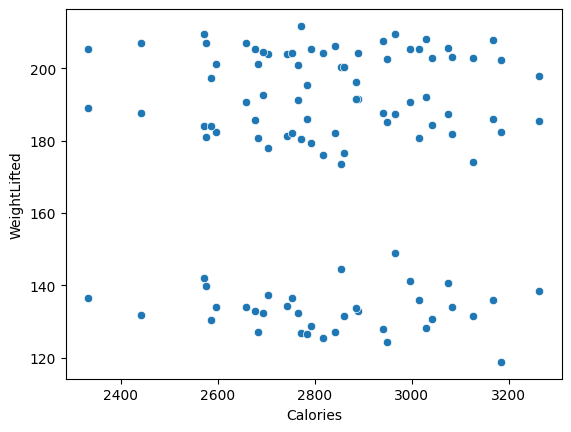

In [6]:
# 1. Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Load the dataset
df = pd.read_csv("../data/workout_data.csv")  # adjust path if needed
df["Date"] = pd.to_datetime(df["Date"])

# 3. Quick overview
print(df.shape)
display(df.head())
display(df["Exercise"].value_counts())

# 4. Plot weight lifted over time for each exercise
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x="Date", y="WeightLifted", hue="Exercise", marker="o")
plt.title("Weight Lifted Over Time by Exercise")
plt.ylabel("Weight (lbs)")
plt.grid(True)
plt.show()

# 5. Average weight lifted per exercise
avg_weight = df.groupby("Exercise")["WeightLifted"].mean()
print("Average weight lifted per exercise:")
print(avg_weight)

# 6. Correlation heatmap (numerical columns)
plt.figure(figsize=(10, 6))
sns.heatmap(df.drop(columns=["Reps", "Sets"]).select_dtypes(include="number").corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Between Workout Factors")
plt.show()

# 7. Boxplot: how soreness affects weight lifted
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x="SorenessLevel", y="WeightLifted", hue="Exercise")
plt.title("Weight Lifted vs. Soreness Level")
plt.show()

# 8. Scatter: Sleep vs WeightLifted (filtered by exercise)
g = sns.FacetGrid(df, col="Exercise", height=4, aspect=1.2)
g.map(sns.scatterplot, "SleepHours", "WeightLifted", alpha=0.7)
g.fig.suptitle("Sleep vs. Weight Lifted by Exercise", y=1.05)
plt.show()

sns.scatterplot(data=df, x='Calories', y='WeightLifted')
plt.show()
